In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## FOR Windows
t21_df = pd.read_csv("D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\new_transaction 2021.csv", index_col=0)
t22_df = pd.read_csv("D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\new_transaction 2022.csv", index_col=0)
t23_df = pd.read_csv("D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\new_transaction 2023.csv", index_col=0)

## FOR Mac
# t21_df = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/new_transaction 2021.csv', index_col=0)
# t22_df = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/new_transaction 2022.csv', index_col=0)
# t23_df = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/new_transaction 2023.csv', index_col=0)

tall_df = pd.concat([t21_df,t22_df,t23_df])
tall_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4129114 entries, 0 to 643128
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   payment_date       object 
 1   ent                object 
 2   center             object 
 3   total_amount       float64
 4   discount           float64
 5   paid_amount        int64  
 6   trans_origin_type  object 
 7   product            object 
 8   qty                int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 315.0+ MB


# EDA

In [3]:
tall_df.describe()

,total_amount,discount,paid_amount,qty
count,4.129114e+06,4.128914e+06,4.129114e+06,4.129114e+06
mean,1.054599e+06,5.406789e+04,6.143339e+04,1.446158e+00
std,8.297746e+05,1.446879e+05,3.122374e+05,9.241014e+00
min,0.000000e+00,0.000000e+00,-3.500000e+05,0.000000e+00
25%,3.580000e+05,0.000000e+00,0.000000e+00,1.000000e+00
50%,9.140000e+05,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.595000e+06,2.500000e+03,0.000000e+00,1.000000e+00
max,9.282500e+07,5.002500e+06,1.809000e+07,1.330000e+04


In [4]:
tall_df['product'].nunique()

562

In [5]:
tall_df['qty'].max()

13300

In [6]:
tall_df.loc[ tall_df['qty'] == tall_df['qty'].max() ]

,payment_date,ent,center,total_amount,discount,paid_amount,trans_origin_type,product,qty
596670,2023-06-23 00:00:00.000,TCEZ1J10,TDCCJ4,0.0,0.0,0,offline,EQE1,13300


In [7]:
tall_df.loc[ tall_df['qty'] >= 50 ]['product'].nunique()

29

In [8]:
# Check duplicate

tall_df.loc[ tall_df.duplicated() == True ]

,payment_date,ent,center,total_amount,discount,paid_amount,trans_origin_type,product,qty
338,2021-01-01 00:00:00.000,TCC4W4RE31I,T2CEQ1,175000.0,0.0,0,online,BC4CC4,1
713,2021-01-01 00:00:00.000,TCC434J33CF,TDCCJE,189000.0,0.0,0,online,5C4C4Q,1
716,2021-01-01 00:00:00.000,TCC434J33CF,TDCCJE,189000.0,0.0,0,online,5C4C4Q,1
957,2021-01-01 00:00:00.000,TZJRRJRP,TDCCJ4,1170000.0,0.0,0,online,6CECC4,1
1117,2021-01-01 00:00:00.000,TCC4WRJ43EI,T7C141,341000.0,0.0,0,online,5C4CC4,1
...,...,...,...,...,...,...,...,...,...
643097,2023-07-06 00:00:00.000,TCC4ZJRWRE7,TUC1CJ,1170000.0,0.0,1170000,online,5C4CCE,2
643101,2023-07-06 00:00:00.000,TCC4ZJRWRE7,TUC1CJ,1170000.0,0.0,1170000,online,5C4CCE,2
643111,2023-07-06 00:00:00.000,TCCEC3R14ZU,TUC1CJ,1170000.0,0.0,1170000,online,5C4CCE,2
643114,2023-07-06 00:00:00.000,TCCEC3R14ZU,TUC1CJ,1170000.0,0.0,1170000,online,5C4CCE,2


In [9]:
tall_df = tall_df.drop_duplicates()
tall_df

,payment_date,ent,center,total_amount,discount,paid_amount,trans_origin_type,product,qty
0,2021-01-01 00:00:00.000,TCC43RQQZ3B,TKC4CJ,1627000.0,0.0,0,online,1ECZ,1
1,2021-01-01 00:00:00.000,TCC43RQQZ3B,TKC4CJ,1627000.0,0.0,0,online,8CEC4Q,1
2,2021-01-01 00:00:00.000,TCC4Q4JZ4Q0,TKCEWQ,594000.0,0.0,0,online,4E4W,2
3,2021-01-01 00:00:00.000,TCC4Q4JZ4Q0,TKCEWQ,594000.0,0.0,0,online,DC4CC4,1
4,2021-01-01 00:00:00.000,TCC4RJ11QE7,TKC14E,468000.0,0.0,0,online,IC4CC4,1
...,...,...,...,...,...,...,...,...,...
643123,2023-07-06 00:00:00.000,TCCEQ1331E7,TKC1Z4,2500.0,NaN,2500,offline,KCQCER,1
643124,2023-07-06 00:00:00.000,TCCEREZCC10,TKC1Z4,2500.0,NaN,2500,offline,KCQCEJ,1
643125,2023-07-06 00:00:00.000,TCCEQ1RJ3JY,TKC1Z4,2500.0,NaN,2500,offline,KCQCEJ,1
643126,2023-07-06 00:00:00.000,TCCEQ4Z4R4Y,TKC1Z4,2500.0,NaN,2500,offline,KCQCEJ,1


In [10]:
df = tall_df.pivot_table(index='ent', columns='product', values='qty', aggfunc=lambda x: len(x.unique()) )
df = df.fillna(0)
df

product,0C1CC1,0C1CC4,0C1CCE,0C4C43,0C4C4C,0C4C4Q,0C4C4W,0C4C4Z,0C4CC1,0C4CC3,...,XC4CCZ,XCECC4,XCECCJ,XCECCQ,XCJC4C,XCJCC3,XCJCCZ,XCQCC4,XP9LI,YC1CC4
ent,,,,,,,,,,,,,,,,,,,,,
884R4EJZ0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
884RC4REI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8C4ECCCC44F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8C4ECCCCC3Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8CC1CCCC3E0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TZZZJZ4Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TZZZREZF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
TZZZW417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
df.index.names = ['index']
df.columns.names = ['']

df = df.reset_index()

df

,index,0C1CC1,0C1CC4,0C1CCE,0C4C43,0C4C4C,0C4C4Q,0C4C4W,0C4C4Z,0C4CC1,...,XC4CCZ,XCECC4,XCECCJ,XCECCQ,XCJC4C,XCJCC3,XCJCCZ,XCQCC4,XP9LI,YC1CC4
0,884R4EJZ0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,884RC4REI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8C4ECCCC44F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8C4ECCCCC3Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,8CC1CCCC3E0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580819,TZZZJZ4Y,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
580820,TZZZREZF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
580821,TZZZW417,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
580822,TZZZZEZ0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


# Collaborative Filtering
- Item base

In [12]:
from scipy.spatial.distance import cosine

items = df.drop(columns='index')
items.head(5)

,0C1CC1,0C1CC4,0C1CCE,0C4C43,0C4C4C,0C4C4Q,0C4C4W,0C4C4Z,0C4CC1,0C4CC3,...,XC4CCZ,XCECC4,XCECCJ,XCECCQ,XCJC4C,XCJCC3,XCJCCZ,XCQCC4,XP9LI,YC1CC4
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
data_ibs = pd.DataFrame(index = items.columns, columns = items.columns)
data_ibs

,0C1CC1,0C1CC4,0C1CCE,0C4C43,0C4C4C,0C4C4Q,0C4C4W,0C4C4Z,0C4CC1,0C4CC3,...,XC4CCZ,XCECC4,XCECCJ,XCECCQ,XCJC4C,XCJCC3,XCJCCZ,XCQCC4,XP9LI,YC1CC4
,,,,,,,,,,,,,,,,,,,,,
0C1CC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0C1CC4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0C1CCE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0C4C43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0C4C4C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XCJCC3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XCJCCZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XCQCC4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
for i in range(0,len(data_ibs.columns)) :
    for j in range(0,len(data_ibs.columns)) :
      # Fill in placeholder with cosine similarities
      data_ibs.iloc[i,j] = 1-cosine(items.iloc[:,i],items.iloc[:,j])
      
data_ibs

,0C1CC1,0C1CC4,0C1CCE,0C4C43,0C4C4C,0C4C4Q,0C4C4W,0C4C4Z,0C4CC1,0C4CC3,...,XC4CCZ,XCECC4,XCECCJ,XCECCQ,XCJC4C,XCJCC3,XCJCCZ,XCQCC4,XP9LI,YC1CC4
,,,,,,,,,,,,,,,,,,,,,
0C1CC1,1,0.108267,0.076277,0.02554,0.011993,0.110959,0.074722,0.026473,0.005227,0.037214,...,0.018342,0.023108,0.049487,0.09481,0.040063,0.065398,0.018264,0.011571,0.019614,0.164922
0C1CC4,0.108267,1,0.11295,0.03009,0.010887,0.067249,0.075646,0.021981,0.0093,0.025595,...,0.007679,0.016275,0.094281,0.105639,0.026557,0.055484,0.010832,0.019356,0.014301,0.124159
0C1CCE,0.076277,0.11295,1,0.018154,0.013276,0.092619,0.08206,0.030944,0.008591,0.036753,...,0.015961,0.014244,0.065228,0.121952,0.05617,0.081335,0.009173,0.029099,0.023514,0.213514
0C4C43,0.02554,0.03009,0.018154,1,0.004123,0.023365,0.028213,0.011892,0.0,0.024233,...,0.0,0.009732,0.009437,0.019228,0.002647,0.043045,0.020511,0.002666,0.004472,0.029561
0C4C4C,0.011993,0.010887,0.013276,0.004123,1,0.011184,0.011158,0.003514,0.003122,0.00523,...,0.0,0.003451,0.011991,0.010777,0.005631,0.008278,0.0,0.0,0.002995,0.016378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XCJCC3,0.065398,0.055484,0.081335,0.043045,0.008278,0.072934,0.091575,0.039173,0.011049,0.06181,...,0.021667,0.05292,0.039229,0.07297,0.022418,1,0.026812,0.005958,0.011223,0.083464
XCJCCZ,0.018264,0.010832,0.009173,0.020511,0.0,0.015455,0.025522,0.011654,0.0,0.01239,...,0.010687,0.004768,0.006936,0.010941,0.005836,0.026812,1,0.002939,0.002191,0.015616
XCQCC4,0.011571,0.019356,0.029099,0.002666,0.0,0.001004,0.001866,0.00426,0.001261,0.0,...,0.003125,0.0,0.010141,0.03057,0.021994,0.005958,0.002939,1,0.0,0.02475


Back - up the result

In [15]:
# data_ibs.to_csv('D:\DATA_Science\GitHub\BeforeGIT\itemRecommendBackup.csv')

# Result

In [54]:
links = data_ibs.stack()
links

0C1CC1  0C1CC1           1
        0C1CC4    0.108267
        0C1CCE    0.076277
        0C4C43     0.02554
        0C4C4C    0.011993
                    ...   
YC1CC4  XCJCC3    0.083464
        XCJCCZ    0.015616
        XCQCC4     0.02475
        XP9LI       0.0225
        YC1CC4           1
Length: 315844, dtype: object

In [55]:
links = pd.DataFrame(links)
links.columns.names = ['']
links.index.names = ['edge1','edge2']

links = links.reset_index().rename(columns={0:'value'})

links

,edge1,edge2,value
0,0C1CC1,0C1CC1,1
1,0C1CC1,0C1CC4,0.108267
2,0C1CC1,0C1CCE,0.076277
3,0C1CC1,0C4C43,0.02554
4,0C1CC1,0C4C4C,0.011993
...,...,...,...
315839,YC1CC4,XCJCC3,0.083464
315840,YC1CC4,XCJCCZ,0.015616
315841,YC1CC4,XCQCC4,0.02475
315842,YC1CC4,XP9LI,0.0225


In [56]:
links_filtered = links.loc[ (links['value'] > 0.5) & (links['edge1'] != links['edge2']) ]
links_filtered

,edge1,edge2,value
15388,0CQCC4,8CQCCR,0.707107
15767,0CQCCE,27T6,0.707107
15813,0CQCCE,4RCC,0.707107
15903,0CQCCE,7CQCC4,0.707107
16017,0CQCCE,EQ4W,0.707107
...,...,...,...
299153,SCQCC1,7CQCCJ,0.707107
299272,SCQCC1,FCQCC4,1
305940,XC4C44,8CQC4C,1
307152,XC4C4E,ICQCCJ,1


# Plot

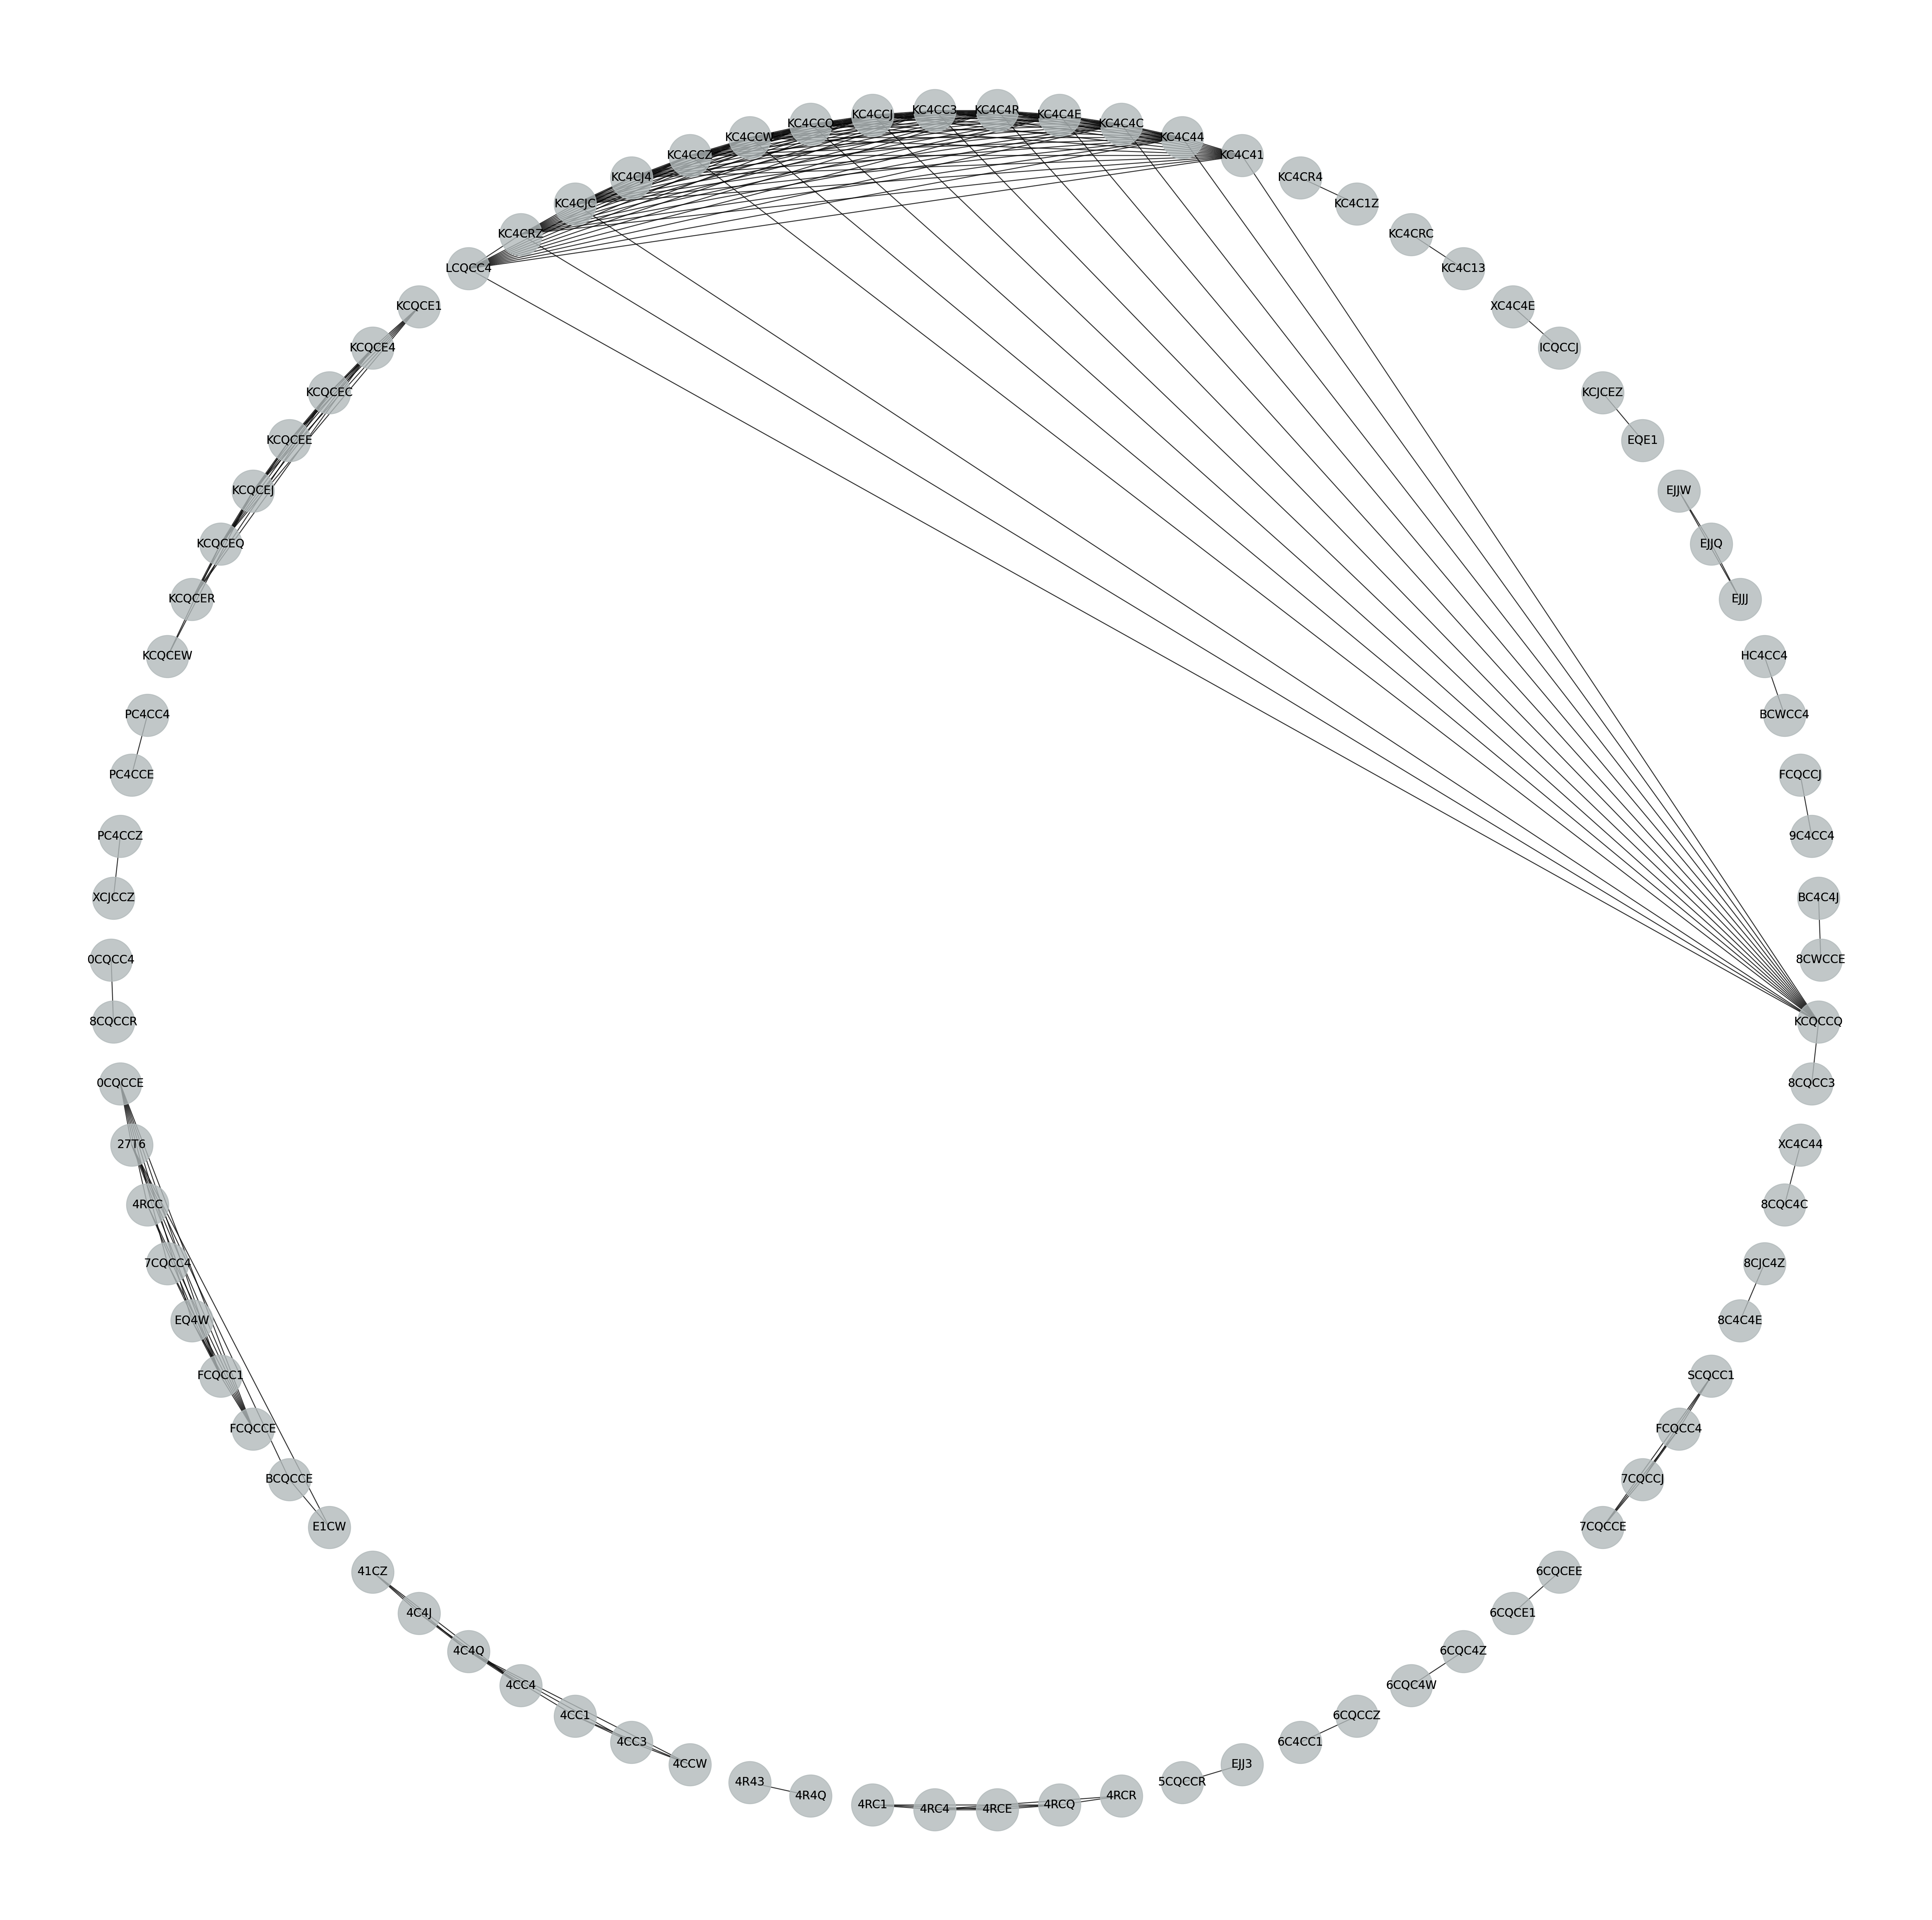

In [218]:
import networkx as nx
import matplotlib.pyplot as plt
import math

fig, axe = plt.subplots(figsize=(36,36), dpi = 200)
# Build your graph
G = nx.from_pandas_edgelist(links_filtered, source = 'edge1', target = 'edge2', edge_attr='value')
# pos = nx.spring_layout(G ,k = 3/math.sqrt(G.order()), scale=90, seed=0)
pos = nx.shell_layout( G, scale = 1 )

nx.draw_networkx(G, pos , node_color = '#B2BABB', node_size = 1950 , alpha = 0.8 )
nx.draw_networkx_labels(G, pos)
nx.get_edge_attributes(G,'value')
# nx.draw_networkx_edge_labels(G, pos, label_pos=0.3)

# Set margins for the axes so that nodes aren't clipped
ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.show()